In [ ]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import sqrt, pi
import random

"""
cc : graphene.a_cc
a : vertical length of rect1 = a * cc 
b : vertical length of rect2 = b * cc
c : horizental length of rect1 = 2 * c * cc, and it can be the number of carbons that filled in the rect1
d : horizental length of rect2 = 2 * d * cc, and it can be the number of carbons that filled in the rect2
"""

def func(repetitions, a, b, c, d, typ):
    
    cc = graphene.a_cc
    A = a * cc
    B = b * cc
    
    l = A + B # length of the one lattice
    
    tshape = pb.rectangle(x = 0, y = 0)

    for i in range(repetitions):
    
        rect1 = pb.Polygon([[c*cc, A + l*i], [-c*cc, A + l*i], [-c*cc, l*i], [c*cc, l*i]])
        rect2 = pb.Polygon([[d*cc, l + l*i], [-d*cc, l + l*i], [-d*cc, A + l*i], [d*cc, A + l*i]])
        
        shape = rect1 + rect2
        tshape = tshape + shape
        
        
    model = pb.Model(graphene.monolayer_4atom(), tshape) #define model
    solver = pb.solver.arpack(model, k=30) #define solver
    kpm = pb.kpm(model) #define kpm
    
    if typ == 'model':
        
        model.shape.plot()
        model.plot()
        plt.show()
    
    if typ == 'ldos_A':
        
        ldos = solver.calc_spatial_ldos(energy = 0, broadening = 0.05)
        ldos.plot(site_radius=(0.03, 0.12))
        pb.pltutils.colorbar(label="LDOS")
        plt.show()
        
    if typ == 'ldos_B':
        
        x = input('x : ') # -c <= x <= c when c >= d
        y = input('y : ') # the position located at y % of the total length of the structure
        
        try:
            x = float(x)
            y = float(y)
            
        except:
            x = -1
            y = -1
                
        ldos = kpm.calc_ldos(energy=np.linspace(-10, 10, 200), broadening=0.05, position=[x, repetitions*l*(y/100)])
        ldos.plot()
        plt.show()
        
    
    if typ == 'dos':
        
        dos = kpm.calc_dos(energy=np.linspace(-10, 10, 500), broadening=0.06, num_random=20)
        dos.plot()
        plt.show()

In [31]:
def ldos(repetitions, a, b, c, d):

    cc = graphene.a_cc
    A = a * cc
    B = b * cc
    
    l = A + B # length of the one lattice
    
    tshape = pb.rectangle(x = 0, y = 0)

    for i in range(repetitions):
    
        rect1 = pb.Polygon([[c*cc, A + l*i], [-c*cc, A + l*i], [-c*cc, l*i], [c*cc, l*i]])
        rect2 = pb.Polygon([[d*cc, l + l*i], [-d*cc, l + l*i], [-d*cc, A + l*i], [d*cc, A + l*i]])
        
        shape = rect1 + rect2
        tshape = tshape + shape
            
    model = pb.Model(graphene.monolayer_4atom(), tshape) #define model
    solver = pb.solver.arpack(model, k=30) #define solver
        
    ldos = solver.calc_spatial_ldos(energy = 0, broadening = 0.05)
    ldos.plot(site_radius=(0.03, 0.12))
    pb.pltutils.colorbar(label="LDOS")
    plt.show()    

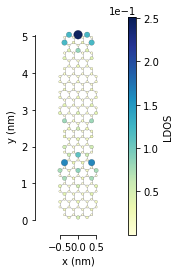

In [41]:
ldos(2, 12, 6, 4, 3)

# Starting Shape

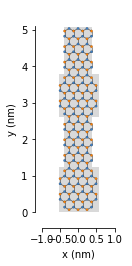

In [12]:
func(2, 9, 9, 4, 3, 'model') # just repeating this form

# Find DoS in same form, various repetitions

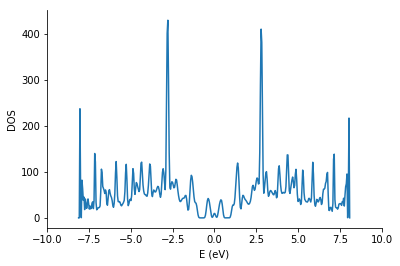

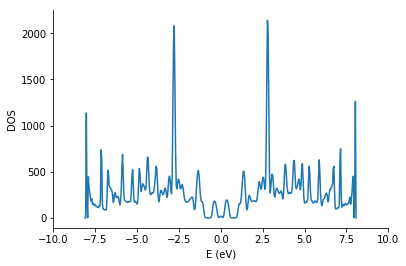

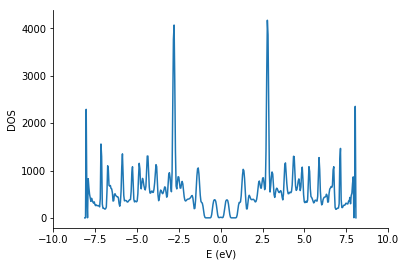

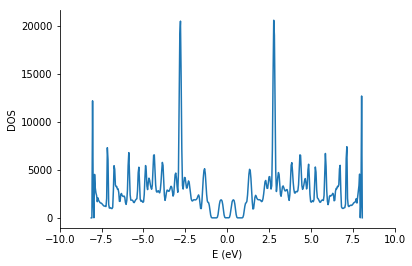

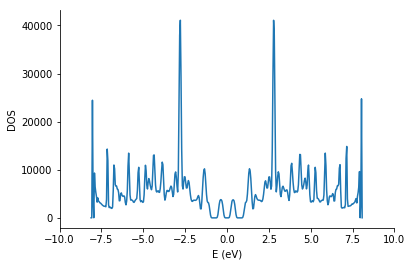

In [13]:
list_repetitions = [10, 50, 100, 500, 1000] # various repetitions
for i in list_repetitions:
    func(i, 9, 9, 4, 3,'dos')

# I concluded that the DoSs has linear relation with repetitions Because they have same form and except linearly increased values of the DoS

# also, they commonly have highest value at E = approximately +- 2.8 eV

# try 2. various form, same repetitions = 100

# i) different sizes of the rect1

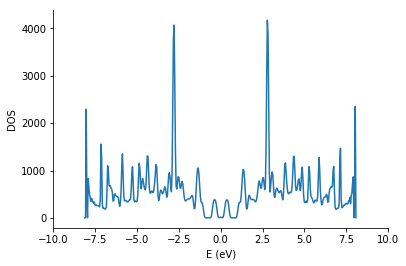

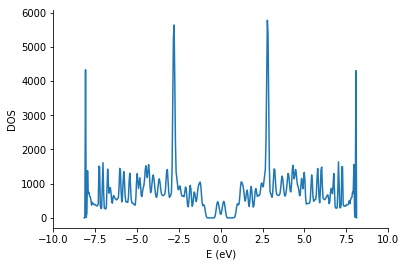

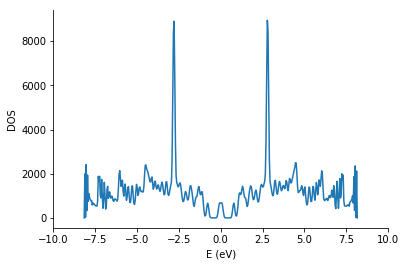

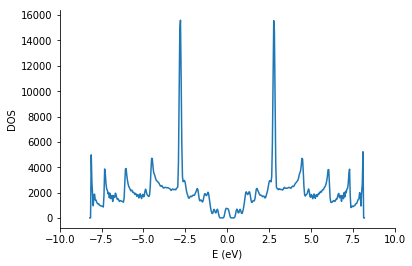

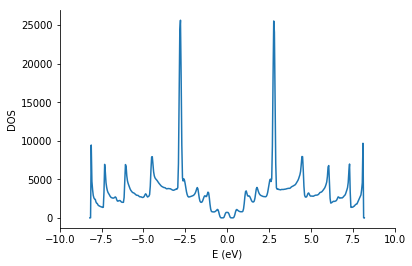

In [8]:
list_diff_size_A = [9, 15, 27, 51, 87]
for i in list_diff_size_A:
    func(100, i, 9, 4, 3, 'dos')

# ii) different sizes of the rect2

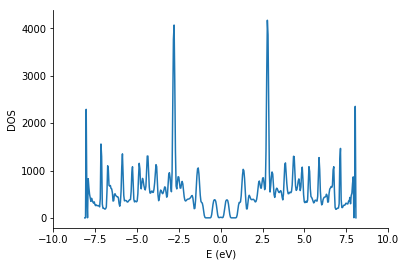

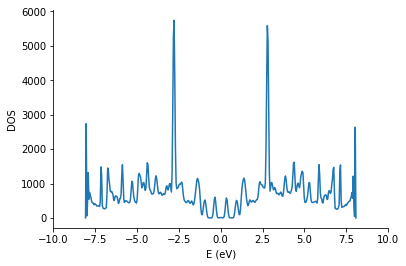

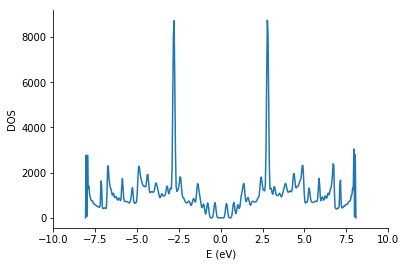

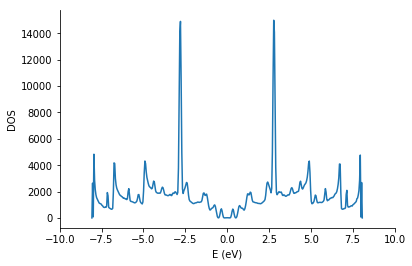

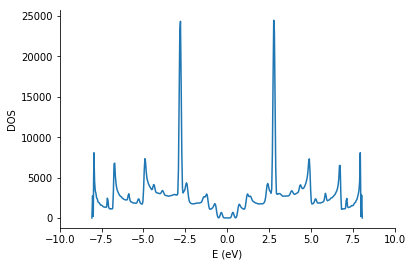

In [10]:
for i in list_diff_size_A:
    func(100, 9, i, 4, 3, 'dos')

# diffrent horizental length

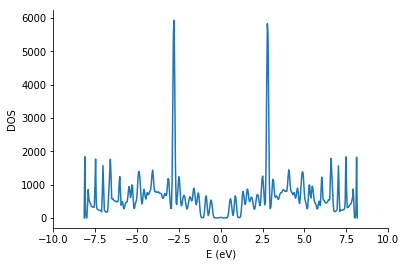

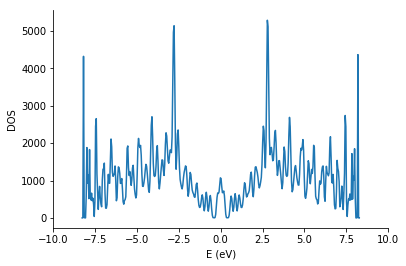

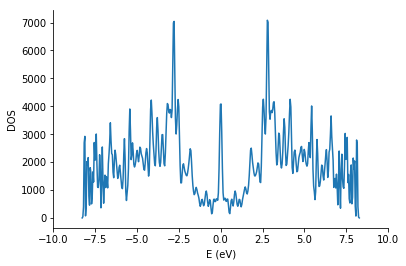

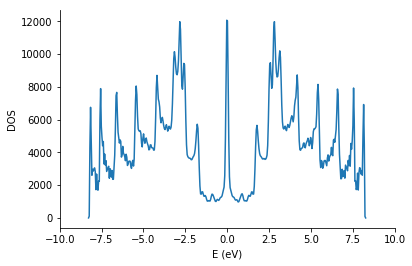

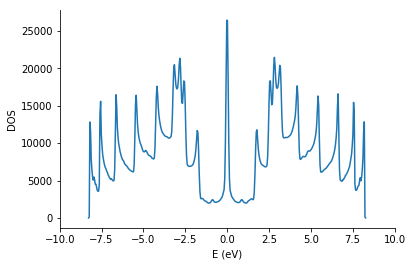

In [7]:
list_diff_size_B = [5, 10, 20, 50, 100]

for i in list_diff_size_B:
    func(100, 9, 9, i, 3, 'dos')

# LDoS

x : 0
y : 90


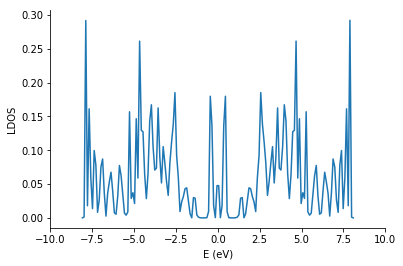

x : 0
y : 90


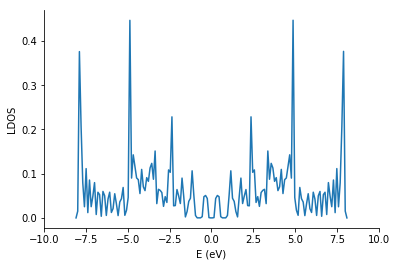

x : 0
y : 90


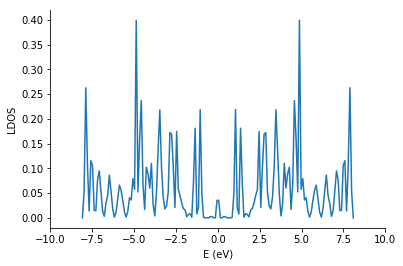

x : 0
y : 90


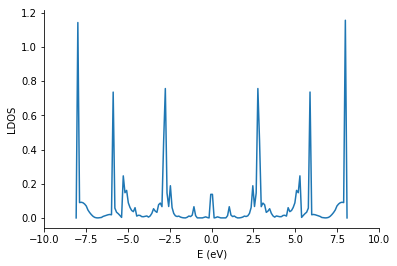

x : 0
y : 90


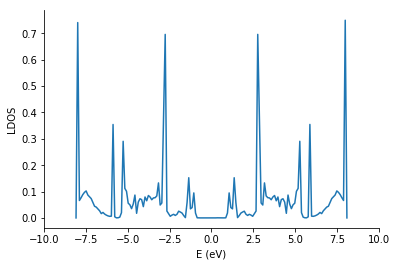

In [30]:
for i in list_repetitions:
    func(i, 9, 9, 4, 3, 'ldos_B')

x : 0
y : 50


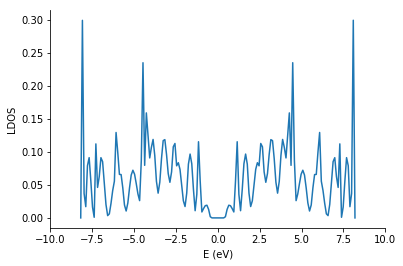

In [53]:
func(100, 12, 9, 4, 4, 'ldos_B')

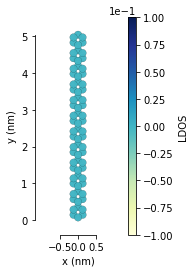

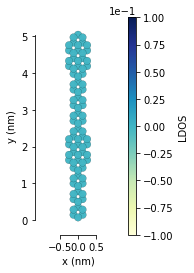

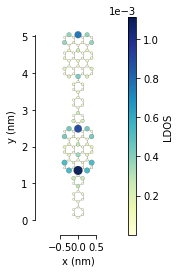

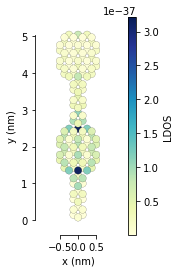

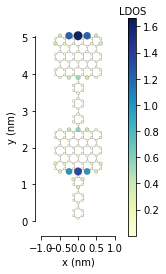

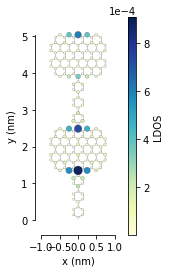

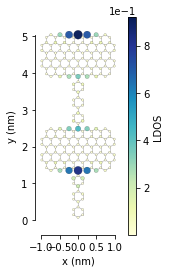

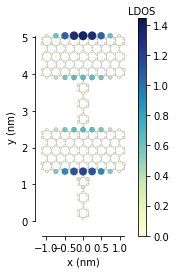

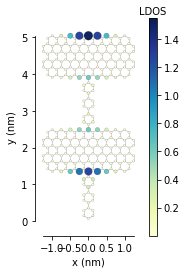

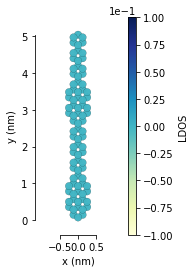

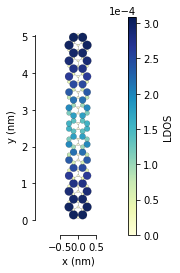

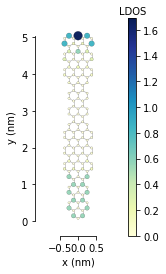

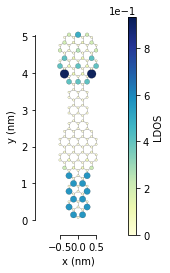

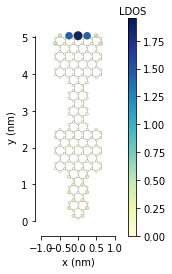

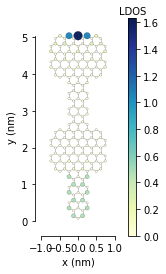

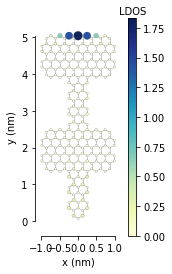

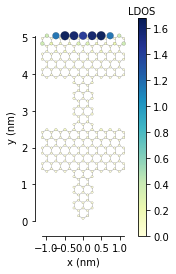

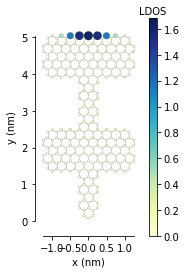

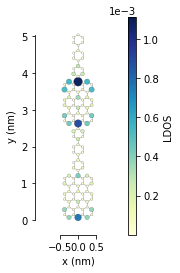

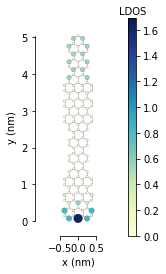

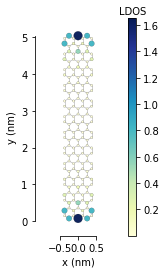

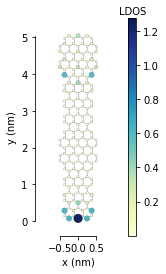

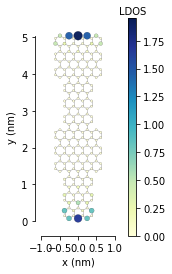

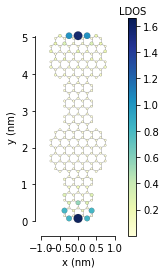

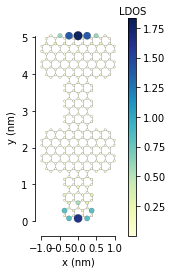

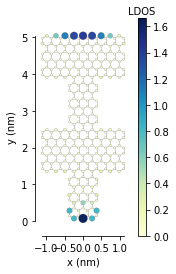

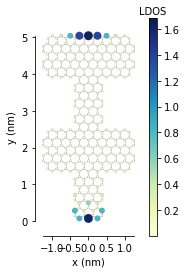

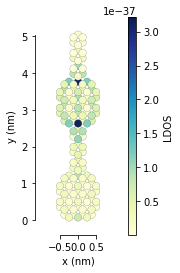

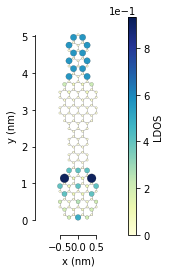

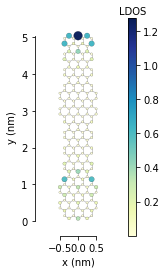

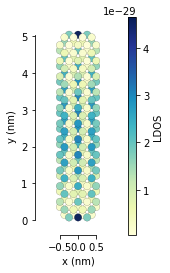

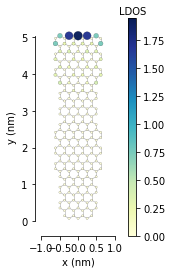

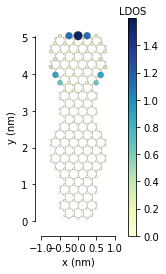

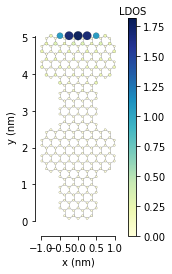

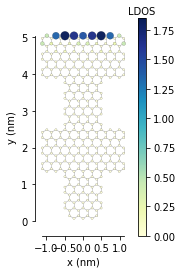

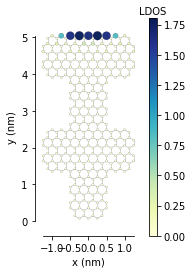

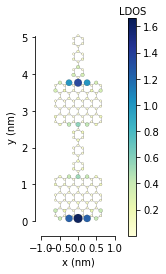

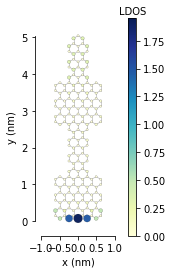

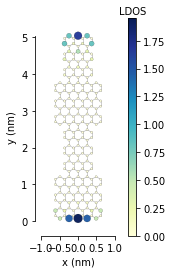

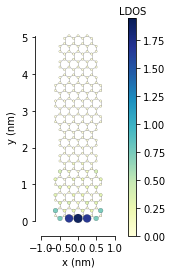

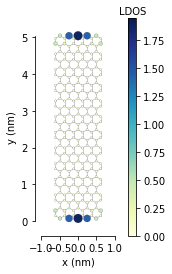

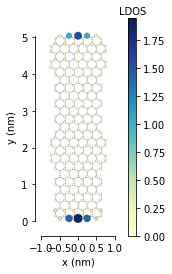

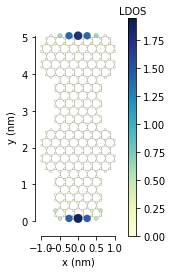

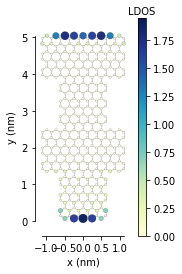

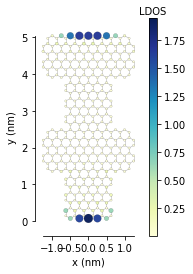

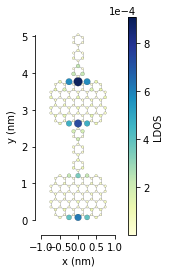

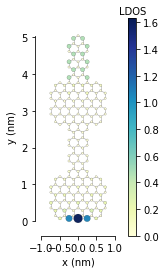

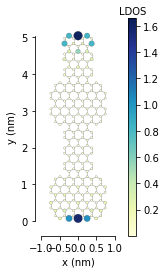

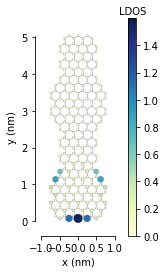

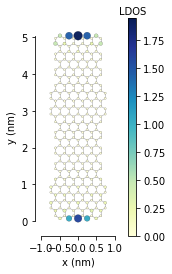

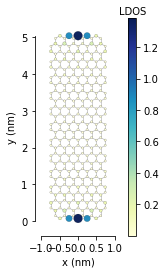

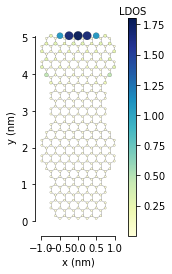

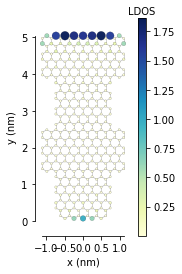

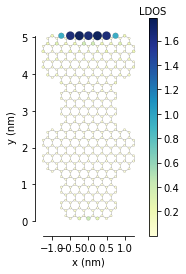

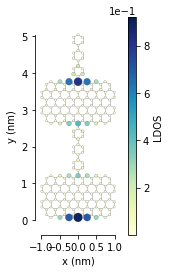

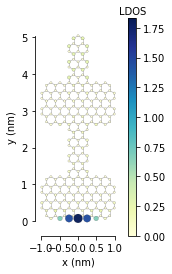

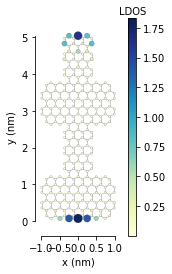

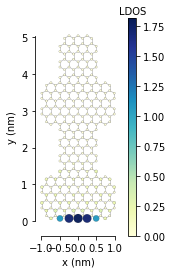

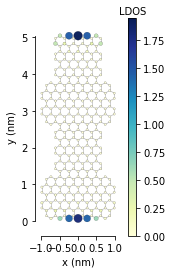

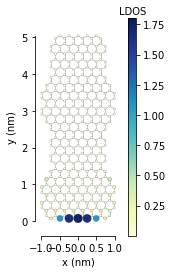

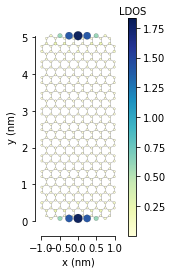

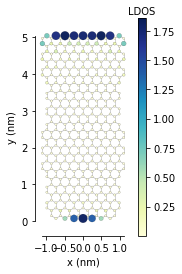

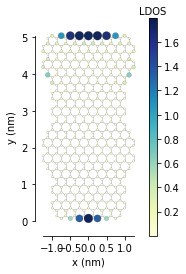

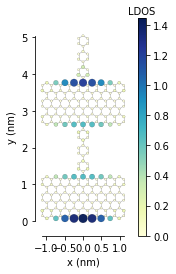

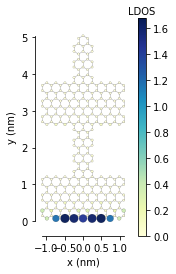

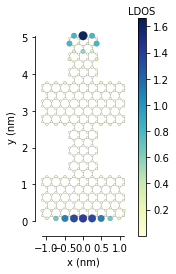

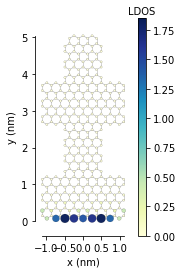

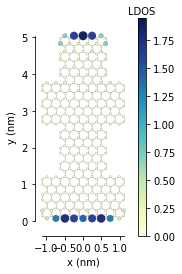

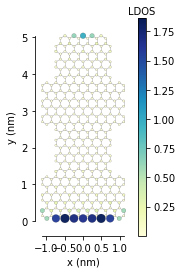

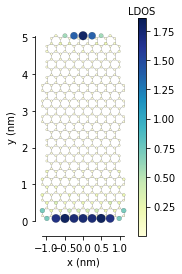

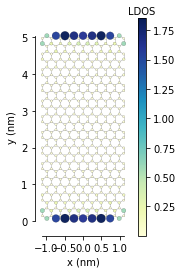

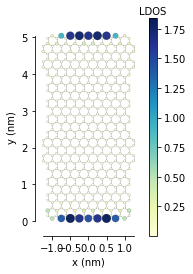

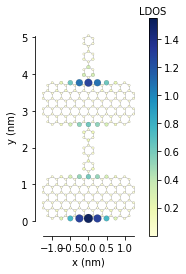

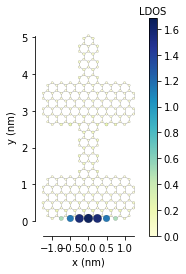

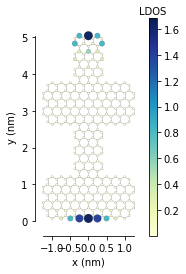

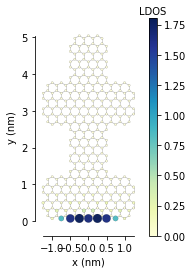

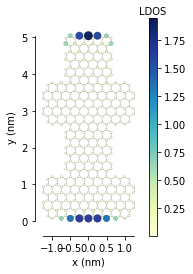

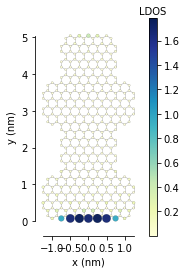

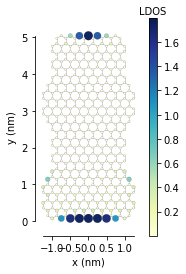

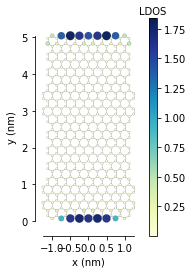

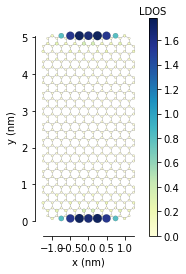

In [65]:

for i in range(1,10):
    for j in range(1,10):
        ldos(2, 9, 9, i, j)
        

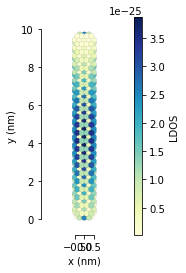

In [75]:
ldos(5, 7, 7, 4, 4)

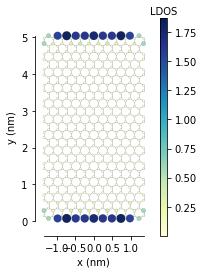

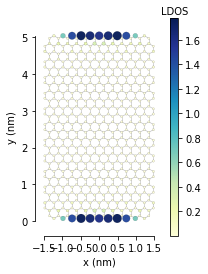

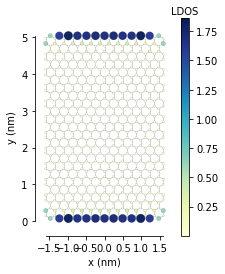

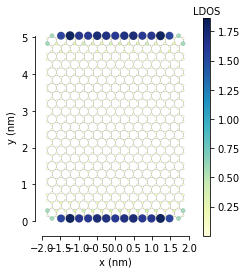

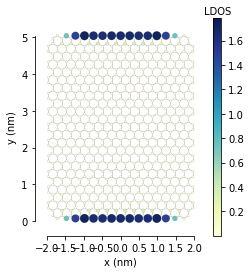

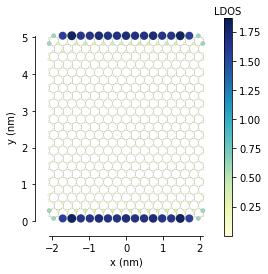

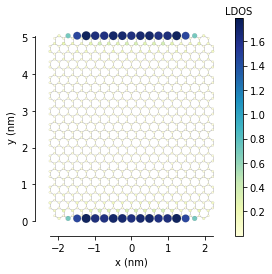

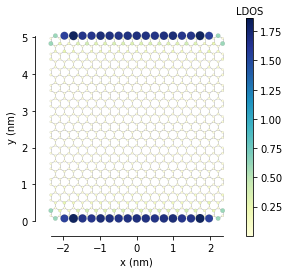

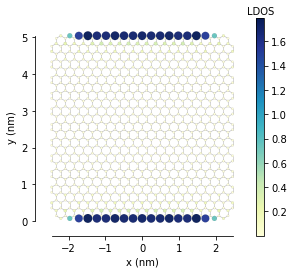

In [76]:
for i in range(10,19):
    ldos(2, 9, 9, i, i)

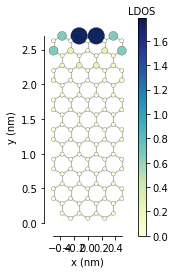

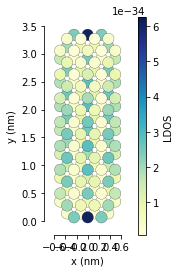

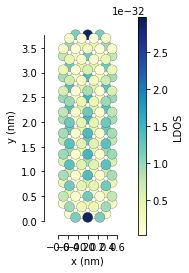

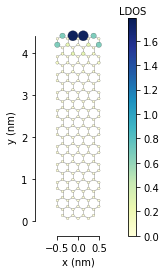

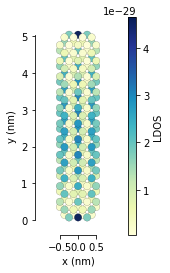

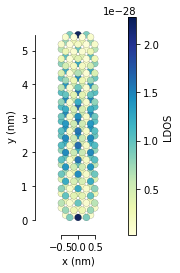

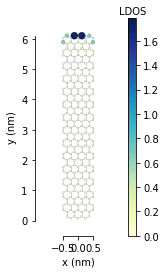

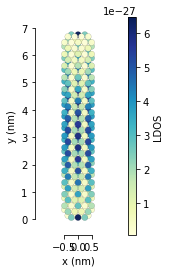

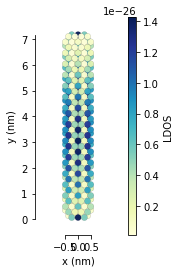

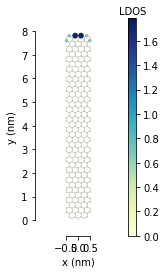

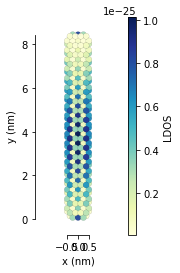

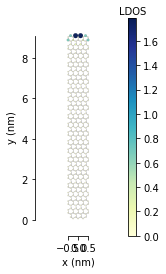

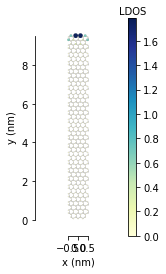

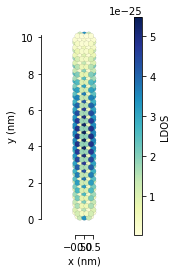

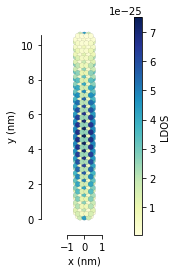

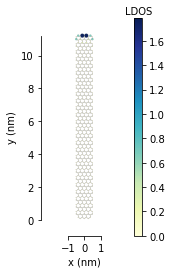

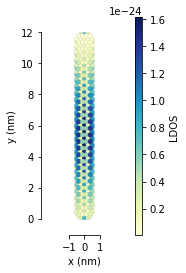

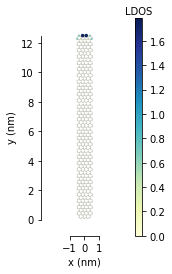

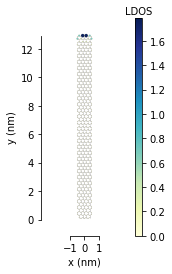

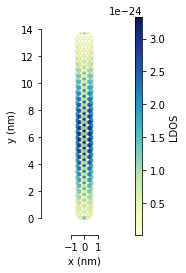

In [79]:
for i in range(5,25):
    ldos(2, i, i, 4, 4)

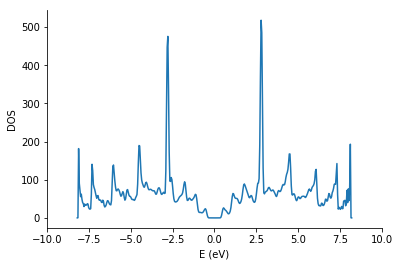

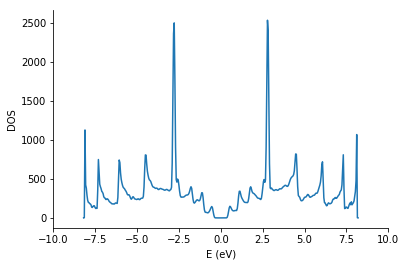

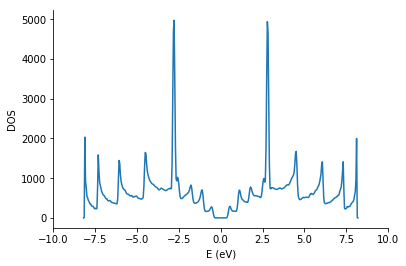

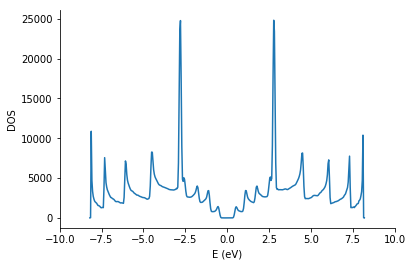

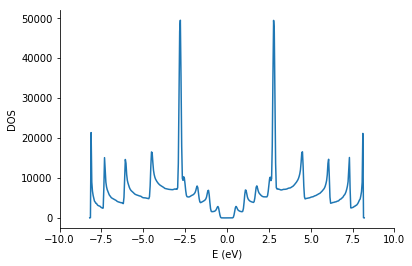

In [86]:
for i in list_repetitions:
    func(i, 9, 9, 4, 4, 'dos')